# Unsupervised Learning in Python

## Chapter 2

In [37]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [38]:
varieties_seeds = [
    'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Kama wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Rosa wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat',
 'Canadian wheat']
samples_seeds = np.array(
    [[14.88  , 14.57  ,  0.8811,  5.554 ,  3.333 ,  1.018 ,  4.956 ],
       [14.69  , 14.49  ,  0.8799,  5.563 ,  3.259 ,  3.586 ,  5.219 ],
       [14.03  , 14.16  ,  0.8796,  5.438 ,  3.201 ,  1.717 ,  5.001 ],
       [13.99  , 13.83  ,  0.9183,  5.119 ,  3.383 ,  5.234 ,  4.781 ],
       [14.11  , 14.26  ,  0.8722,  5.52  ,  3.168 ,  2.688 ,  5.219 ],
       [13.02  , 13.76  ,  0.8641,  5.395 ,  3.026 ,  3.373 ,  4.825 ],
       [15.49  , 14.94  ,  0.8724,  5.757 ,  3.371 ,  3.412 ,  5.228 ],
       [16.2   , 15.27  ,  0.8734,  5.826 ,  3.464 ,  2.823 ,  5.527 ],
       [13.5   , 13.85  ,  0.8852,  5.351 ,  3.158 ,  2.249 ,  5.176 ],
       [15.36  , 14.76  ,  0.8861,  5.701 ,  3.393 ,  1.367 ,  5.132 ],
       [15.78  , 14.91  ,  0.8923,  5.674 ,  3.434 ,  5.593 ,  5.136 ],
       [14.46  , 14.35  ,  0.8818,  5.388 ,  3.377 ,  2.802 ,  5.044 ],
       [11.23  , 12.63  ,  0.884 ,  4.902 ,  2.879 ,  2.269 ,  4.703 ],
       [14.34  , 14.37  ,  0.8726,  5.63  ,  3.19  ,  1.313 ,  5.15  ],
       [16.84  , 15.67  ,  0.8623,  5.998 ,  3.484 ,  4.675 ,  5.877 ],
       [17.32  , 15.91  ,  0.8599,  6.064 ,  3.403 ,  3.824 ,  5.922 ],
       [18.72  , 16.19  ,  0.8977,  6.006 ,  3.857 ,  5.324 ,  5.879 ],
       [18.88  , 16.26  ,  0.8969,  6.084 ,  3.764 ,  1.649 ,  6.109 ],
       [18.76  , 16.2   ,  0.8984,  6.172 ,  3.796 ,  3.12  ,  6.053 ],
       [19.31  , 16.59  ,  0.8815,  6.341 ,  3.81  ,  3.477 ,  6.238 ],
       [17.99  , 15.86  ,  0.8992,  5.89  ,  3.694 ,  2.068 ,  5.837 ],
       [18.85  , 16.17  ,  0.9056,  6.152 ,  3.806 ,  2.843 ,  6.2   ],
       [19.38  , 16.72  ,  0.8716,  6.303 ,  3.791 ,  3.678 ,  5.965 ],
       [18.96  , 16.2   ,  0.9077,  6.051 ,  3.897 ,  4.334 ,  5.75  ],
       [18.14  , 16.12  ,  0.8772,  6.059 ,  3.563 ,  3.619 ,  6.011 ],
       [18.65  , 16.41  ,  0.8698,  6.285 ,  3.594 ,  4.391 ,  6.102 ],
       [18.94  , 16.32  ,  0.8942,  6.144 ,  3.825 ,  2.908 ,  5.949 ],
       [17.36  , 15.76  ,  0.8785,  6.145 ,  3.574 ,  3.526 ,  5.971 ],
       [13.32  , 13.94  ,  0.8613,  5.541 ,  3.073 ,  7.035 ,  5.44  ],
       [11.43  , 13.13  ,  0.8335,  5.176 ,  2.719 ,  2.221 ,  5.132 ],
       [12.01  , 13.52  ,  0.8249,  5.405 ,  2.776 ,  6.992 ,  5.27  ],
       [11.34  , 12.87  ,  0.8596,  5.053 ,  2.849 ,  3.347 ,  5.003 ],
       [12.02  , 13.33  ,  0.8503,  5.35  ,  2.81  ,  4.271 ,  5.308 ],
       [12.44  , 13.59  ,  0.8462,  5.319 ,  2.897 ,  4.924 ,  5.27  ],
       [11.55  , 13.1   ,  0.8455,  5.167 ,  2.845 ,  6.715 ,  4.956 ],
       [11.26  , 13.01  ,  0.8355,  5.186 ,  2.71  ,  5.335 ,  5.092 ],
       [12.46  , 13.41  ,  0.8706,  5.236 ,  3.017 ,  4.987 ,  5.147 ],
       [11.81  , 13.45  ,  0.8198,  5.413 ,  2.716 ,  4.898 ,  5.352 ],
       [11.27  , 12.86  ,  0.8563,  5.091 ,  2.804 ,  3.985 ,  5.001 ],
       [12.79  , 13.53  ,  0.8786,  5.224 ,  3.054 ,  5.483 ,  4.958 ],
       [12.67  , 13.32  ,  0.8977,  4.984 ,  3.135 ,  2.3   ,  4.745 ],
       [11.23  , 12.88  ,  0.8511,  5.14  ,  2.795 ,  4.325 ,  5.003 ]]
)

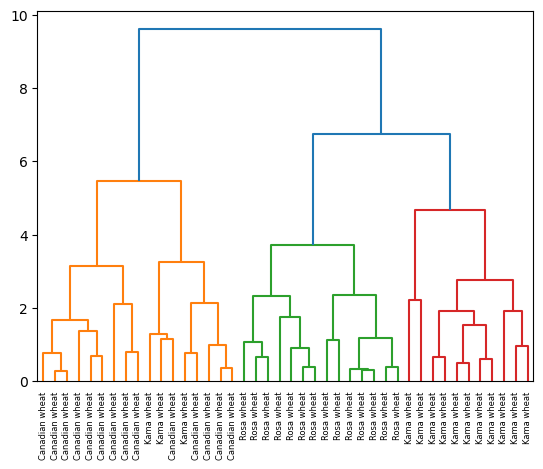

In [39]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings_seeds = linkage(samples_seeds, method="complete")

# Plot the dendrogram, using varieties as labels
dendrogram(mergings_seeds,
           labels=varieties_seeds,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [40]:
stock = pd.read_csv("company-stock-movements-2010-2015-incl.csv")
print(stock.head())

movements = stock.drop(columns=["Unnamed: 0"], axis=1).to_numpy()
print(movements.shape)
companies = stock["Unnamed: 0"].to_numpy()
print(companies.shape)

         Unnamed: 0  2010-01-04  2010-01-05  2010-01-06  2010-01-07  \
0             Apple    0.580000   -0.220005   -3.409998   -1.170000   
1               AIG   -0.640002   -0.650000   -0.210001   -0.420000   
2            Amazon   -2.350006    1.260009   -2.350006   -2.009995   
3  American express    0.109997    0.000000    0.260002    0.720002   
4            Boeing    0.459999    1.770000    1.549999    2.690003   

   2010-01-08  2010-01-11  2010-01-12  2010-01-13  2010-01-14  ...  \
0    1.680011   -2.689994   -1.469994    2.779997   -0.680003  ...   
1    0.710001   -0.200001   -1.130001    0.069999   -0.119999  ...   
2    2.960006   -2.309997   -1.640007    1.209999   -1.790001  ...   
3    0.190003   -0.270001    0.750000    0.300004    0.639999  ...   
4    0.059997   -1.080002    0.360000    0.549999    0.530002  ...   

   2013-10-16  2013-10-17  2013-10-18  2013-10-21  2013-10-22  2013-10-23  \
0    0.320008    4.519997    2.899987    9.590019   -6.540016    5.959976  

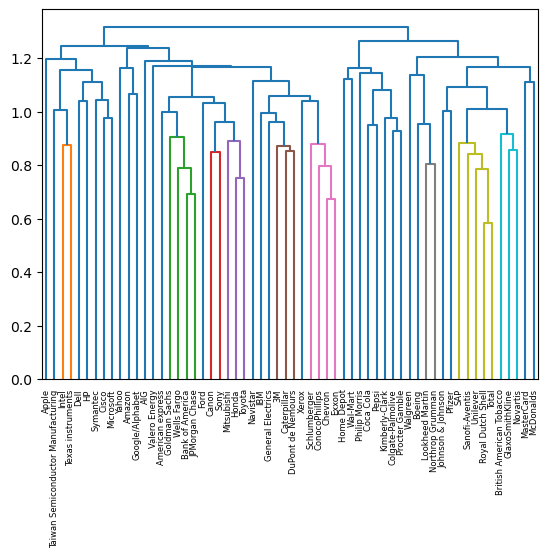

In [41]:
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method="complete")

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [42]:
samples = np.array([[ 2., 12.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0., 10.,  0.,  4.,  0.,  5.,  7.,  0.,  0.,  3.,  0.,  6.,  0.],
       [12.,  0.,  4.,  0.,  0.,  0.,  0.,  6.,  0.,  7.,  8.,  0.,  3.,
         0.,  0.,  0.,  0.,  5.,  1., 12.,  0.,  0.,  2.,  0., 10.,  0.],
       [ 0., 12.,  3.,  0., 12., 10.,  0.,  0.,  0.,  7.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  6.,  0.,  5.,  0.,  2.,  0.,  0.,  8.,  4.],
       [ 0.,  3., 12.,  0.,  0.,  5.,  0.,  0.,  0.,  1.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  8.,  4.,  0.,  7.,  6., 10.,  0.],
       [ 0.,  2.,  0., 12.,  0.,  8.,  0.,  0.,  0.,  4.,  1.,  0.,  7.,
         6.,  0.,  0.,  0.,  5.,  3., 12.,  0.,  0.,  0.,  0., 10.,  0.],
       [ 7.,  1.,  0.,  8.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
         0.,  0.,  5.,  0.,  0.,  6., 12.,  0.,  0.,  2.,  0., 10.,  0.],
       [ 7.,  4.,  3.,  0., 12.,  5.,  0.,  0.,  0.,  8.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., 12.,  6.,  0.,  0.,  1., 10.,  2.,  0.],
       [ 0.,  3.,  5.,  8.,  0.,  2., 10.,  0.,  0.,  4.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  0.,  7.,  0.],
       [ 8.,  5.,  4.,  1.,  0., 12.,  0.,  7.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  6., 12.,  0.,  0.,  3.,  0., 10.,  0.],
       [ 0.,  5.,  6.,  0.,  0.,  1., 12.,  0.,  0.,  2.,  0.,  0.,  3.,
         0.,  0.,  0.,  0.,  0.,  4.,  8., 12.,  0.,  7.,  0., 10.,  0.],
       [ 8.,  5.,  0.,  0.,  0., 12.,  0., 12.,  0.,  6.,  0.,  0.,  4.,
         0.,  0.,  0.,  3.,  0.,  2., 10.,  0.,  0.,  1.,  0.,  7.,  0.],
       [ 8.,  1.,  4.,  6.,  0.,  5.,  0.,  0., 12.,  0.,  0.,  0.,  3.,
         0.,  0.,  0.,  0.,  0.,  7., 10.,  0.,  0.,  2.,  0., 12.,  0.],
       [ 0., 10.,  1.,  0.,  8.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  6.,  0.,  5.,  4.,  0.,  0., 12.,  7.,  3.,  0.],
       [ 0.,  4.,  6.,  0.,  0.,  0.,  0.,  3.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  7.,  5.,  0.,  1., 12.,  0.,  0., 10.,  0.,  8.,  0.],
       [ 7.,  3.,  0.,  0.,  4., 10.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  2.,  8., 12.,  0.,  0.,  0.,  6.,  0.],
       [ 0.,  7.,  6.,  0.,  0.,  4.,  0.,  1.,  0.,  3.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  5.,  8.,  0.,  0., 10.,  0., 12.,  0.],
       [12.,  0.,  8.,  0.,  4.,  5.,  0.,  0.,  0., 12.,  0.,  0.,  0.,
         3.,  0.,  0.,  0.,  0.,  7.,  6.,  0.,  1.,  2.,  0., 10.,  0.],
       [12.,  1.,  0.,  7.,  0.,  3.,  0.,  0.,  0.,  0., 12.,  0.,  2.,
         0.,  0.,  6.,  5.,  0.,  4.,  8.,  0.,  0.,  0.,  0., 10.,  0.],
       [ 2.,  5.,  7.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0., 12.,  0.,
         0.,  1.,  0.,  0.,  0., 10., 12.,  0.,  0.,  8.,  3.,  6.,  0.],
       [ 8.,  5.,  1.,  0.,  0.,  7.,  0., 12.,  0.,  4.,  0.,  0.,  2.,
         0.,  0.,  0.,  0.,  0.,  3., 10.,  0.,  0.,  0.,  0.,  6.,  0.],
       [ 0.,  3.,  6.,  0.,  0.,  4.,  0.,  5.,  0.,  1.,  0.,  0., 12.,
         0.,  0.,  0.,  0.,  0.,  8., 10.,  0.,  0.,  7.,  2., 12.,  0.],
       [ 0.,  8.,  2.,  1.,  3.,  0.,  0.,  0.,  0.,  5.,  0.,  0.,  0.,
         0.,  0.,  0.,  4.,  0., 10.,  7.,  0.,  0., 12.,  6.,  0.,  0.],
       [ 0.,  6.,  1.,  0.,  0.,  5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  7., 12.,  0., 10.,  8.,  0.,  0.,  2.,  0.,  4.,  3.],
       [ 6.,  5.,  3.,  2.,  1.,  7.,  0.,  0.,  0., 12.,  0.,  0.,  0.,
        12.,  0.,  0.,  0.,  0.,  4., 10.,  0.,  0.,  0.,  0.,  8.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  7.,  0.,  6.,  0.,  5.,  3.,  0.,  0.,
         0., 12.,  0.,  2.,  0., 10.,  8.,  4.,  0.,  0.,  0., 12.,  0.],
       [ 0.,  6.,  4.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  0., 12.,  8.,  0.,  5., 12.,  0.,  0.,  7.,  0., 10.,  0.],
       [ 0.,  5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  4.,  0.,  2.,
         0.,  0., 12., 12.,  0.,  6.,  8.,  0.,  0.,  7.,  0., 10.,  0.],
       [ 0., 12.,  0.,  6.,  0.,  8.,  0.,  0.,  0.,  2.,  0.,  0.,  5.,
         0.,  7.,  0.,  0., 12.,  0., 10.,  0.,  0.,  0.,  3.,  4.,  1.],
       [ 7.,  5.,  4.,  8.,  0.,  2.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,
         0.,  0.,  1.,  3.,  0.,  0., 12.,  0.,  0.,  0.,  0., 10.,  0.],
       [ 0.,  0.,  0.,  7.,  0.,  5.,  6.,  0.,  0.,  1.,  0.,  0.,  3.,
         0.,  4.,  0.,  2.,  0.,  0., 10., 12.,  0.,  0.,  0.,  8.,  0.],
       [ 0.,  8.,  0.,  0.,  2.,  5.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  3., 12.,  0., 10.,  6.,  0.,  0.,  7.,  0.,  4.,  0.],
       [ 2.,  7.,  4.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  6.,
         0.,  0.,  5.,  0.,  0., 12.,  8.,  0.,  0., 10.,  0., 12.,  0.],
       [12.,  4.,  8.,  6.,  0.,  0.,  0.,  7.,  0.,  3.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  5., 12.,  0.,  0.,  2.,  0., 10.,  0.],
       [ 2.,  5.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  6.,  8.,  0.,  7., 10.,  0.,  0.,  4.,  0., 12.,  0.],
       [ 2.,  6.,  0.,  0.,  5.,  8.,  4.,  3.,  0.,  0.,  0.,  0., 10.,
         0.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,  1.,  0.,  7.,  0.],
       [ 0.,  3.,  6.,  0.,  0.,  2.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  4., 10., 12.,  0.,  5.,  0.,  7.,  0.],
       [ 6.,  4.,  2.,  0.,  0., 12.,  0.,  0.,  0., 10.,  0.,  0.,  0.,
         0.,  3.,  0.,  0.,  0.,  5.,  8.,  0., 12.,  1.,  0.,  7.,  0.],
       [ 0., 12.,  5.,  0.,  0.,  4.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,
         0.,  0.,  0.,  6.,  0., 10.,  8.,  0.,  1., 12.,  2.,  7.,  0.],
       [ 0.,  1., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  8.,  0.,
         0.,  7.,  0.,  0.,  0.,  5.,  6., 12.,  2.,  0.,  0.,  4.,  0.],
       [ 8.,  5.,  6.,  0., 12.,  1.,  0.,  0.,  0.,  4.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0., 10.,  3.,  0.,  0.,  2., 12.,  7.,  0.],
       [ 7.,  4.,  0., 10.,  0.,  2.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,
         0.,  0.,  5.,  3.,  0.,  8., 12.,  0.,  0.,  1.,  0., 12.,  0.],
       [ 0.,  6.,  0.,  0.,  0.,  8.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  3., 12.,  0., 10.,  7.,  0.,  4.,  1.,  0.,  5., 12.]]
)

country_names = [
    'Albania',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Belarus',
 'Belgium',
 'Bosnia & Herzegovina',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'F.Y.R. Macedonia',
 'Finland',
 'France',
 'Georgia',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Latvia',
 'Lithuania',
 'Malta',
 'Moldova',
 'Montenegro',
 'Norway',
 'Poland',
 'Russia',
 'San Marino',
 'Serbia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'The Netherlands',
 'Ukraine',
 'United Kingdom']

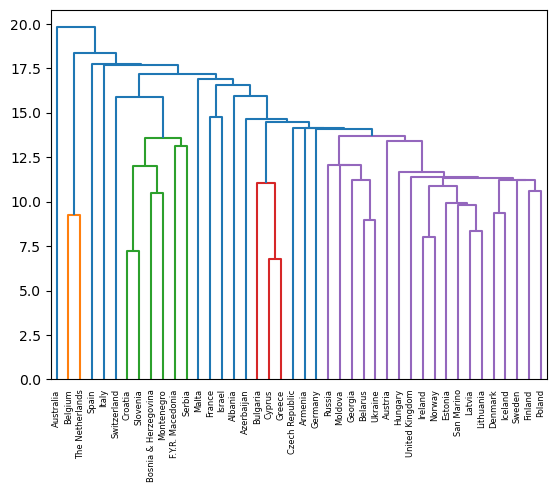

In [43]:
# Calculate the linkage: mergings
mergings = linkage(samples, method="single")

# Plot the dendrogram
dendrogram(mergings,
           labels=country_names,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()

In [44]:
# Use fcluster to extract labels: labels
labels_seeds = fcluster(mergings_seeds, 6, criterion="distance")

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels_seeds, 'varieties': varieties_seeds})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                      14           3           0
2                       0           0          14
3                       0          11           0


In [45]:
grains = pd.read_csv("seeds.csv", header=None)
samples = grains.drop(columns=[7]).to_numpy()
print(samples.shape)

variety_numbers = grains[7].to_numpy()
print(variety_numbers.shape)

(210, 7)
(210,)


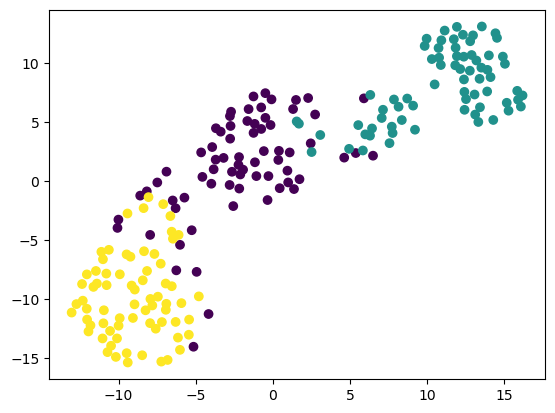

In [46]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=variety_numbers)
plt.show()


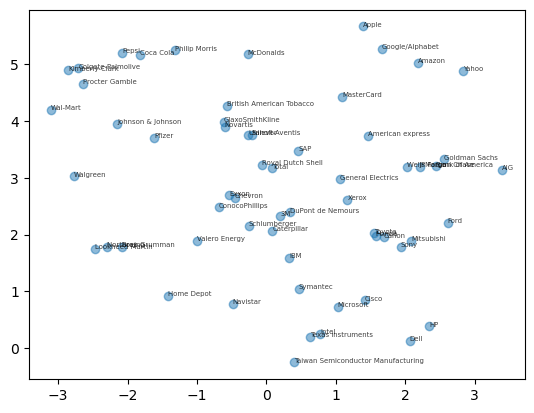

In [47]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()